**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: Operaciones de Aprendizaje Automático**

Tecnológico de Monterrey

**Fase 1 – Procesamiento y Modelado Inicial**
En esta primera etapa aprenderás a trabajar con los datos y a construir tus primeros modelos:

* Realizar un análisis del problema y generar una propuesta de valor.
* Manipular y preparar datos.
* Explorar y preprocesar información.
* Aplicar técnicas de versionado para asegurar reproducibilidad y trazabilidad.
* Construir, ajustar y evaluar modelos de Machine Learning.

---

**EQUIPO 10**

**ALUMNOS:**

Gabriela Lizeth Moreno Hernández - AXXXXX

Alejandro Chávez Campos  -  AXXXXX

Carlos Armando Alcántar Sánchez - A01311747

Luis Fernando Caporal Montes de Oca  -  A01795898

Yamil Abraham Nechar Reyes - A01795726

# Caravan Insurance

Dataset proporcionado por la compañía holandesa de minería de datos Sentient Machine Research. El objetivo principal es predecir qué clientes tienen una póliza de seguro para caravanas.

### Características principales:

* Fuente: Datos de clientes reales, anonimizados y preparados para una competición de minería de datos.

* Volumen: Contiene información de más de 9.000 clientes en total.

* Variables: Cada cliente se describe mediante 86 atributos.

Tipos de Datos:

* **Datos Sociodemográficos (Atributos 1-43)**: Información derivada de los códigos postales de los clientes. Todos los residentes de una misma zona postal comparten estos mismos atributos (ej. porcentaje de hogares alquilados, distribución por nivel de ingresos, etc.).

* **Datos de Uso de Productos** (Atributos 44-86): Reflejan la posesión o uso de otros productos y servicios por parte del cliente.

* **Variable Objetivo:** El atributo 86, "CARAVAN: Number of mobile home policies", indica si un cliente tiene o no un seguro de caravana.

### Estructura de los Archivos:

El proyecto se divide en tres archivos con campos separados por tabuladores:

##### TICDATA2000.txt (Conjunto de Entrenamiento):

Registros: 5.822 clientes.

Contenido: Incluye los 86 atributos completos, incluida la variable objetivo. Se utiliza para desarrollar, entrenar y validar los modelos predictivos.

##### TICEVAL2000.txt (Conjunto de Evaluación):

Registros: 4.000 clientes.

Contenido: Tiene el mismo formato que el archivo de entrenamiento, pero no incluye la variable objetivo. Este archivo se utiliza para realizar las predicciones finales con el modelo ya construido.

#####  TICTGTS2000.txt (Soluciones del Conjunto de Evaluación):

Contenido: Contiene las respuestas reales (targets) para los 4.000 clientes del conjunto de evaluación. Solo los organizadores tenían esta información, permitiendo así la evaluación objetiva de las predicciones realizadas por los participantes.

Nota Importante: Todas las variables cuyo nombre comienza por "M" son variables de código postal que proporcionan información sobre la distribución de una característica específica en el área de residencia del cliente.

In [1]:
# --- Librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import pointbiserialr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
# Configuración de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

## Preprocesamiento de datos

**1.1 Carga de Datos**

In [2]:
file_name = 'insurance_company_original.csv'
sociodemographic_cols = [f"SD_{i}" for i in range(1, 44)]
product_cols = [f"PD_{i}" for i in range(44, 86)]
cols = sociodemographic_cols + product_cols + ["target"]

df = pd.read_csv(file_name, header=None, names=cols)
df.head()

,SD_1,SD_2,SD_3,SD_4,SD_5,SD_6,SD_7,SD_8,SD_9,SD_10,...,PD_77,PD_78,PD_79,PD_80,PD_81,PD_82,PD_83,PD_84,PD_85,target
0,33,1,3,2,8,0,5,1.1,3.1,7,...,0.37,0.38,0.39,1.13,0.4,0.41,0.42,0.43,0.44,0.45
1,37,1,2,2,8,1,4,1.0,4.0,6,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00
2,37,1,2,2,8,0,4,2.0,4.0,3,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00
3,9,1,3,3,3,2,3,2.0,4.0,5,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00
4,40,1,4,2,10,1,4,1.0,4.0,7,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00


1.2 Información General del Dataset

In [3]:
print("Información general del dataset:")
print(df.info())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SD_1    5822 non-null   int64  
 1   SD_2    5822 non-null   int64  
 2   SD_3    5822 non-null   int64  
 3   SD_4    5822 non-null   int64  
 4   SD_5    5822 non-null   int64  
 5   SD_6    5822 non-null   int64  
 6   SD_7    5822 non-null   int64  
 7   SD_8    5822 non-null   float64
 8   SD_9    5822 non-null   float64
 9   SD_10   5822 non-null   int64  
 10  SD_11   5822 non-null   float64
 11  SD_12   5822 non-null   float64
 12  SD_13   5822 non-null   float64
 13  SD_14   5822 non-null   float64
 14  SD_15   5822 non-null   int64  
 15  SD_16   5822 non-null   float64
 16  SD_17   5822 non-null   float64
 17  SD_18   5822 non-null   float64
 18  SD_19   5822 non-null   float64
 19  SD_20   5822 non-null   float64
 20  SD_21   5822 non-null   float64
 21  SD_2

In [4]:
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
              SD_1         SD_2         SD_3         SD_4         SD_5  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean     24.253349     1.110615     2.678805     2.991240     5.773617   
std      12.846706     0.405842     0.789835     0.814589     2.856760   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%      10.000000     1.000000     2.000000     2.000000     3.000000   
50%      30.000000     1.000000     3.000000     3.000000     7.000000   
75%      35.000000     1.000000     3.000000     3.000000     8.000000   
max      41.000000    10.000000     5.000000     6.000000    10.000000   

              SD_6         SD_7         SD_8         SD_9        SD_10  ...  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000  ...   
mean      0.696496     4.626932     1.069924     3.258519     6.183442  ...   
std       1.003234     1.715843     1.017502     1.597644     1.9094

In [5]:
df.loc[0]

SD_1      33.00
SD_2       1.00
SD_3       3.00
SD_4       2.00
SD_5       8.00
          ...  
PD_82      0.41
PD_83      0.42
PD_84      0.43
PD_85      0.44
target     0.45
Name: 0, Length: 86, dtype: float64

La primera fila fue eliminada porque contiene valores inconsistentes con el resto del dataset:
* Valores numéricos fuera de rango
* Su target no es 0 ni 1

Esto indica un problema de lectura o formato, y su inclusión podría sesgar el modelo.

In [6]:
df = df.iloc[1:].reset_index(drop=True)


1.3 Valores faltantes

In [7]:
print("\nValores faltantes por columna:")

cnt=0
for col in df.columns:
    if df[col].isna().sum() > 0:
        print(f'{col}: {round(df[col].isna().sum()/len(df),2)}')
        cnt +=1 
if cnt==0:
    print('No hay faltantes')



Valores faltantes por columna:
No hay faltantes


1.4 Detectar incosistencias

#### 1.4.1 Eliminar observaciones repetidas es una buena práctica para evitar sobreajuste del modelo. La presencia de filas idénticas puede hacer que el algoritmo aprenda patrones redundantes y otorgue un peso excesivo a ciertas combinaciones de atributos, reduciendo su capacidad de generalización sobre nuevos datos.

In [8]:
prev_len = len(df)

duplicados = df[df.duplicated(keep=False)]
print(f"Filas con más de una aparición exacta (duplicados): {len(duplicados)}")
print(f"Porcentaje del dataset: {len(duplicados)/len(df)*100:.2f}%")


df = df.drop_duplicates()
print(f'Se han eliminado {prev_len-len(df)} filas duplicadas (se mantiene la primer observación)')

Filas con más de una aparición exacta (duplicados): 1078
Porcentaje del dataset: 18.52%
Se han eliminado 602 filas duplicadas (se mantiene la primer observación)


# EDA

In [9]:
# Balance de clases
target_dist = df['target'].value_counts()
print(f"Distribución target: {target_dist}")
positive = target_dist[1]/len(df)*100
case = "Se trata de un caso desbalanceado" if positive < 20 else "No hay desbalanceo de clases"
print('')
print(f"Ratio positivo: {positive:.2f}%, {case}")

Distribución target: 0.0    4879
1.0     340
Name: target, dtype: int64

Ratio positivo: 6.51%, Se trata de un caso desbalanceado


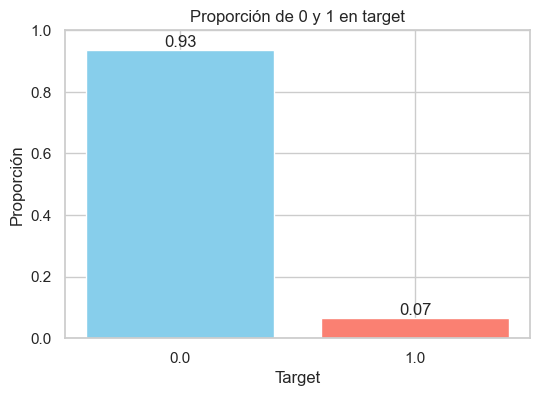

In [10]:
counts = df['target'].value_counts()
proportions = counts / counts.sum()

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(proportions.index.astype(str), proportions.values, color=['skyblue', 'salmon'])
ax.set_ylim(0, 1)
ax.set_ylabel('Proporción')
ax.set_xlabel('Target')
ax.set_title('Proporción de 0 y 1 en target')

# Añadir etiquetas encima de cada barra sin usar ciclo for
ax.bar_label(bars, fmt='%.2f')

plt.show()

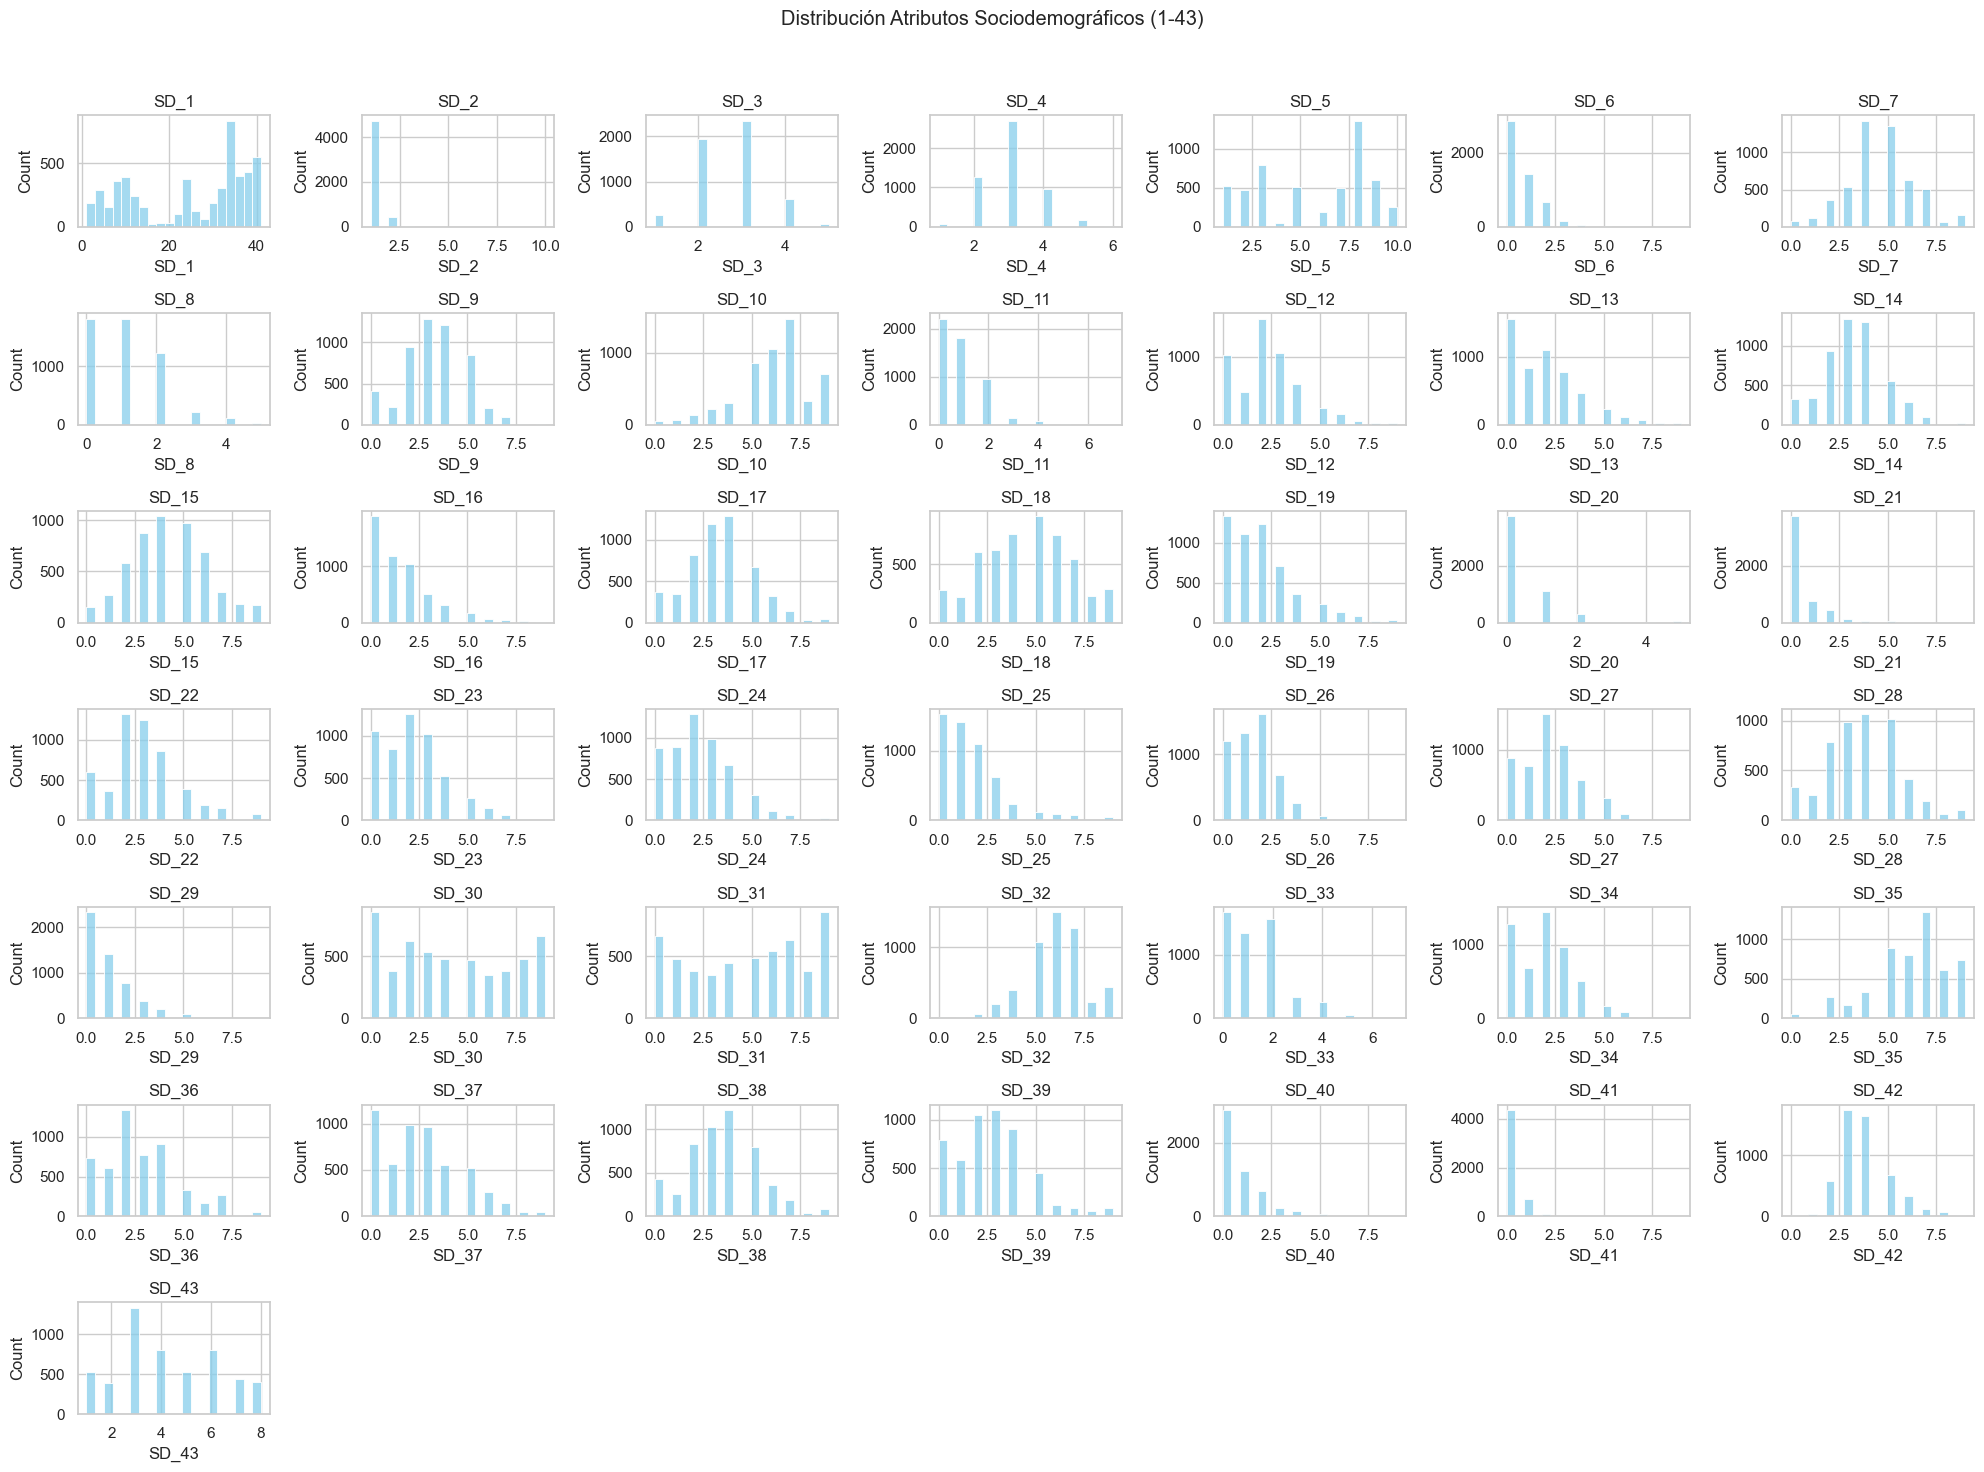

In [11]:
# Columnas
socio_cols = df.columns[:43]      # Atributos 1–43
product_cols = df.columns[43:-1]  # Atributos 44–84
target_col = df.columns[-1]       # Última columna: CARAVAN

# ---------------------------------------
# 3️⃣ Distribución de features
# ---------------------------------------

# A) Sociodemográficos
plt.figure(figsize=(20,15))
for i, col in enumerate(socio_cols):
    plt.subplot(7, 7, i+1)
    sns.histplot(df[col], bins=20, kde=False, color='skyblue')
    plt.title(col)
plt.suptitle("Distribución Atributos Sociodemográficos (1-43)")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

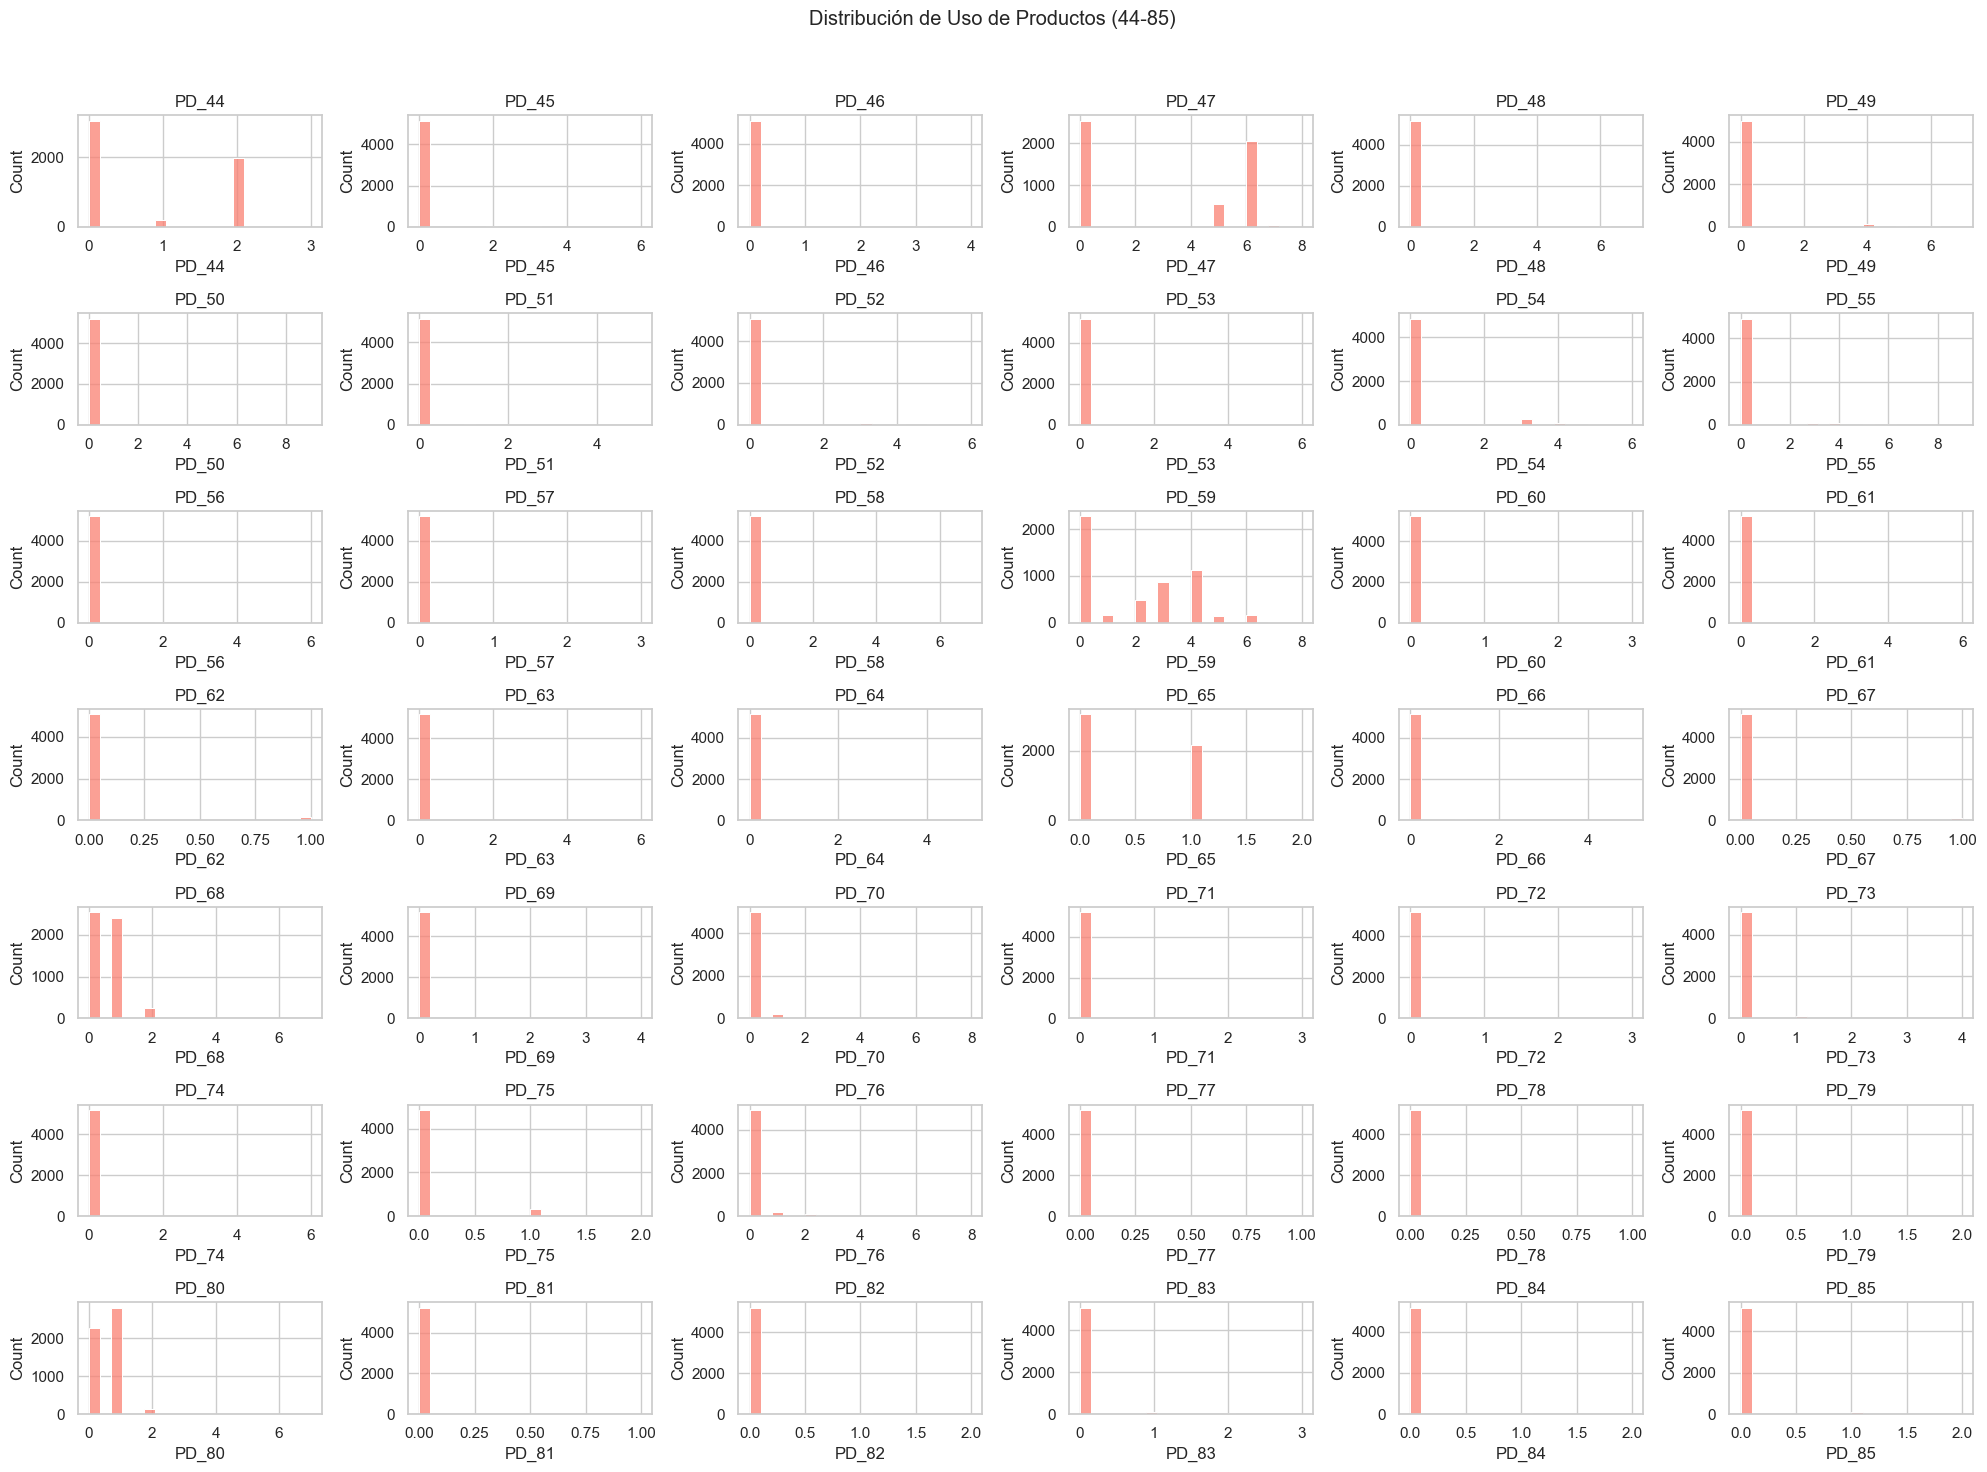

In [12]:
# B) Productos
plt.figure(figsize=(20,15))
for i, col in enumerate(product_cols):
    plt.subplot(7, 6, i+1)  # Ajustado a 6 columnas para que quepan
    sns.histplot(df[col], bins=20, kde=False, color='salmon')
    plt.title(col)
plt.suptitle("Distribución de Uso de Productos (44-85)")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

CORRELACIONES FUERTES ENTRE VARIABLES SOCIODEMOGRÁFICAS (|r| > 0.7):
    var1   var2  correlation
6  SD_30  SD_31     0.999529
8  SD_35  SD_36     0.999202
0   SD_1   SD_5     0.992801
3  SD_10  SD_12     0.888044
1   SD_3  SD_15     0.796949
5  SD_17  SD_18     0.743157
2   SD_7   SD_9     0.741762
4  SD_12  SD_13     0.741067
7  SD_32  SD_34     0.740027


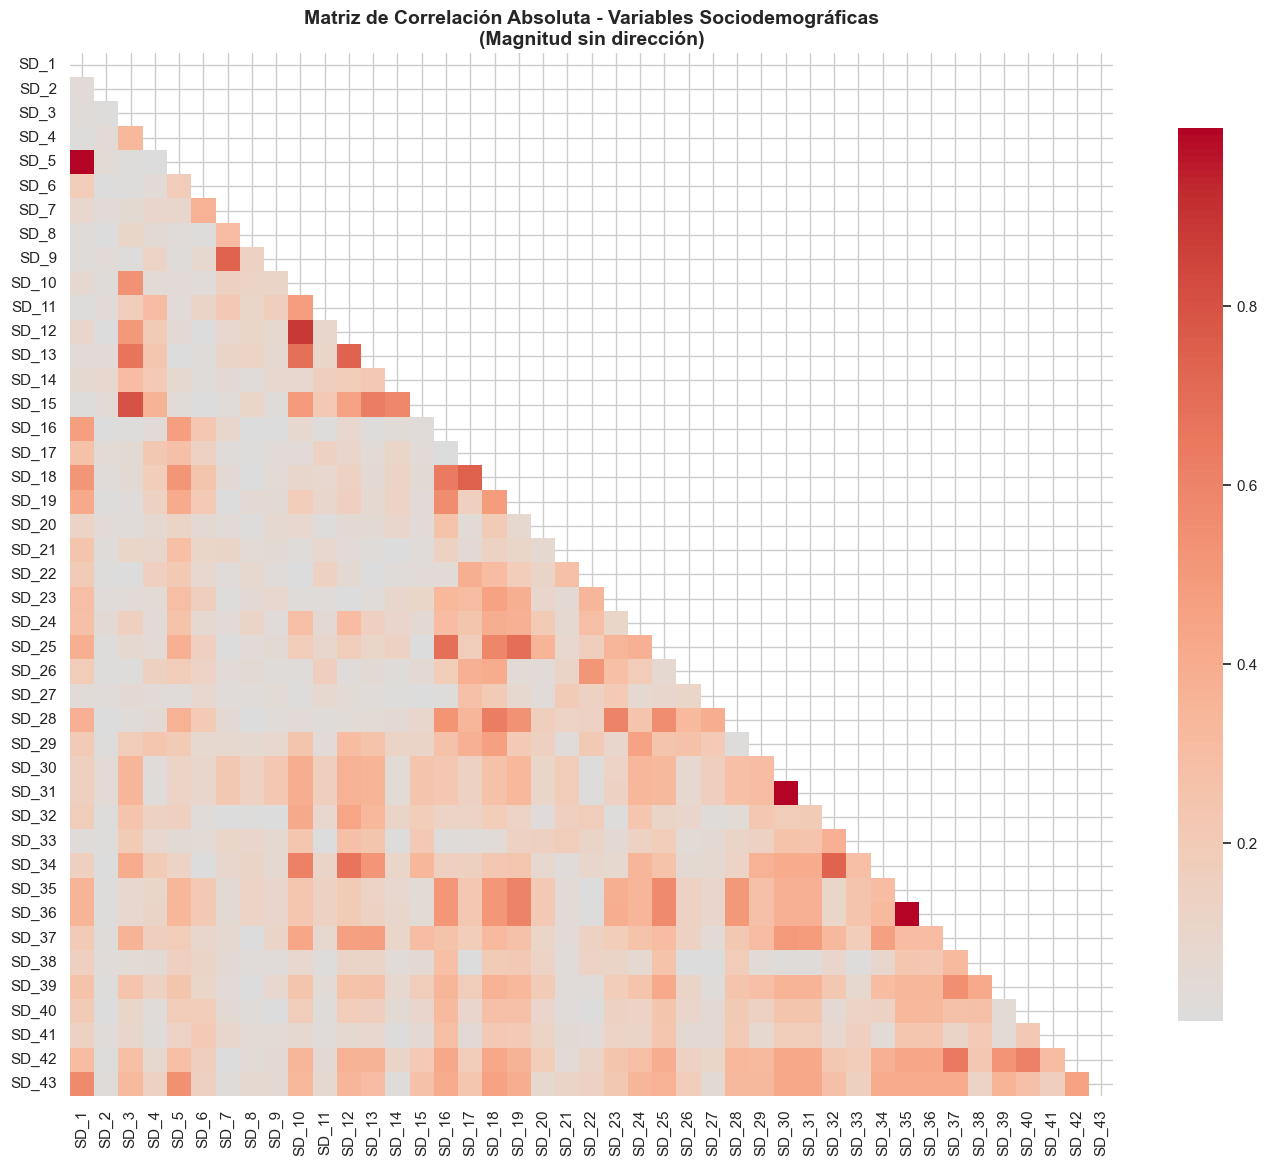

In [13]:
corr_abs = df[socio_cols].corr().abs()

high_corr_pairs = []
for i in range(len(corr_abs.columns)):
    for j in range(i+1, len(corr_abs.columns)):
        if corr_abs.iloc[i, j] > 0.7:
            high_corr_pairs.append({
                'var1': corr_abs.columns[i],
                'var2': corr_abs.columns[j], 
                'correlation': corr_abs.iloc[i, j]
            })

high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('correlation', ascending=False)

print("CORRELACIONES FUERTES ENTRE VARIABLES SOCIODEMOGRÁFICAS (|r| > 0.7):")
print(high_corr_df.head(10))

mask = np.triu(np.ones_like(corr_abs, dtype=bool))

plt.figure(figsize=(14, 12))
sns.heatmap(corr_abs, 
            mask=mask,
            cmap='coolwarm', 
            center=0,
            annot=False,
            square=True,
            cbar_kws={'shrink': 0.8})
plt.title("Matriz de Correlación Absoluta - Variables Sociodemográficas\n(Magnitud sin dirección)", 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

CORRELACIONES FUERTES ENTRE VARIABLES DE PRODUCTOS (|r| > 0.7):
     var1   var2  correlation
2   PD_46  PD_67     0.987549
13  PD_57  PD_78     0.979954
0   PD_44  PD_65     0.979796
10  PD_54  PD_75     0.967607
20  PD_64  PD_85     0.966185
7   PD_51  PD_72     0.966042
6   PD_50  PD_71     0.948656
14  PD_58  PD_79     0.948408
18  PD_62  PD_83     0.935480
8   PD_52  PD_73     0.929653


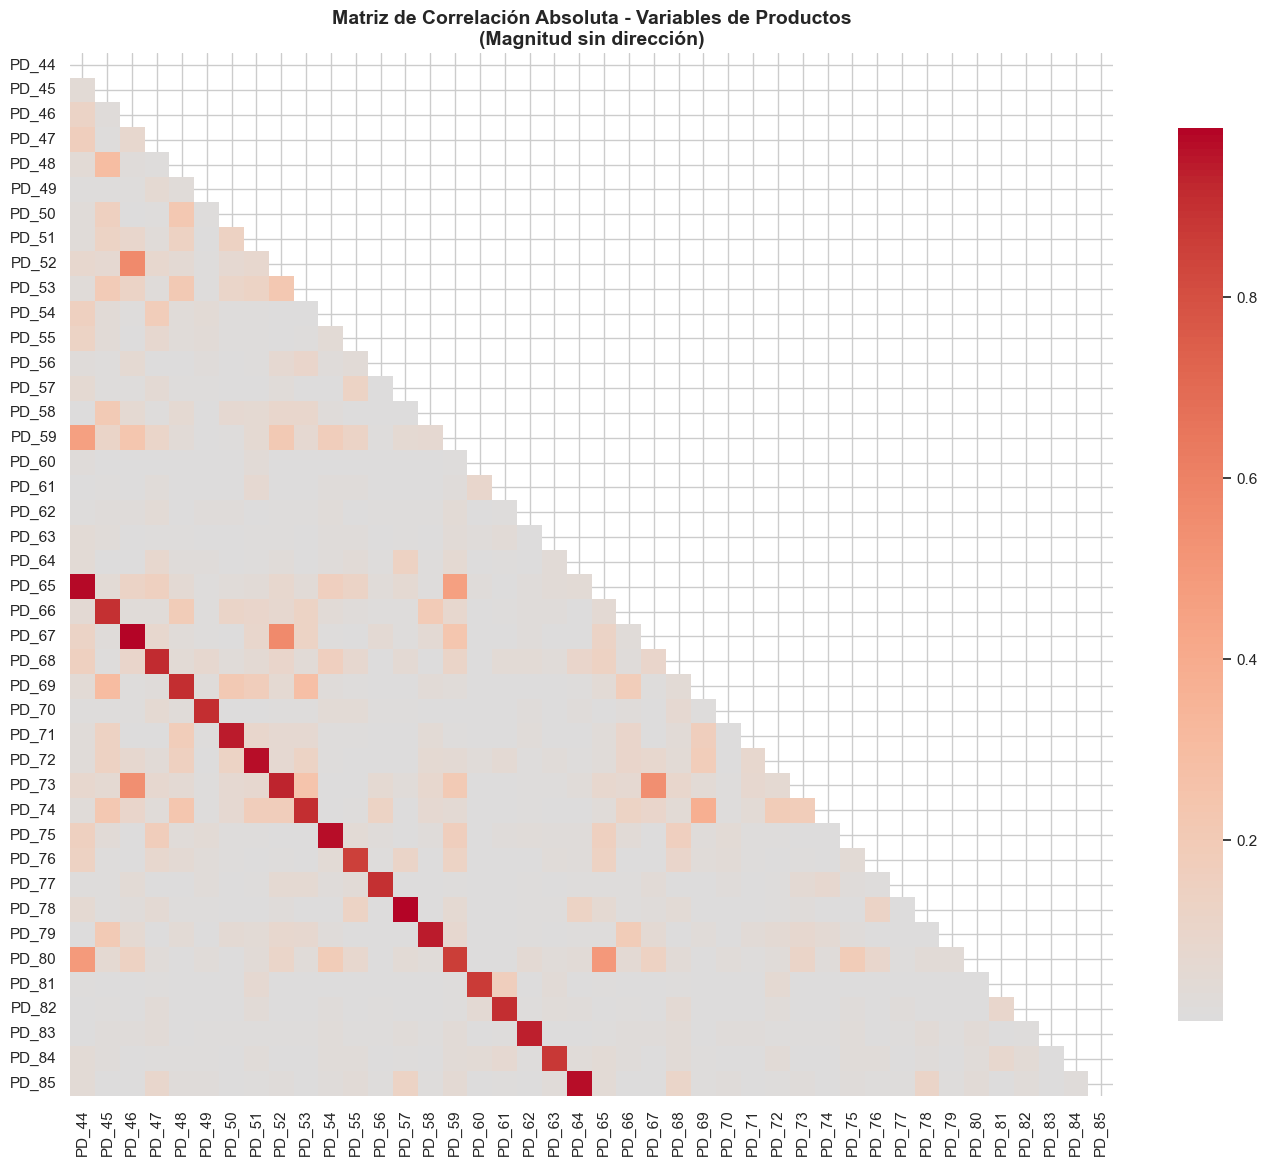

In [14]:
corr_abs_products = df[product_cols].corr().abs()

high_corr_pairs_products = []
for i in range(len(corr_abs_products.columns)):
    for j in range(i+1, len(corr_abs_products.columns)):
        if corr_abs_products.iloc[i, j] > 0.7:
            high_corr_pairs_products.append({
                'var1': corr_abs_products.columns[i],
                'var2': corr_abs_products.columns[j], 
                'correlation': corr_abs_products.iloc[i, j]
            })

high_corr_df_products = pd.DataFrame(high_corr_pairs_products).sort_values('correlation', ascending=False)

print("CORRELACIONES FUERTES ENTRE VARIABLES DE PRODUCTOS (|r| > 0.7):")
print(high_corr_df_products.head(10))

mask_products = np.triu(np.ones_like(corr_abs_products, dtype=bool))

plt.figure(figsize=(14, 12))
sns.heatmap(corr_abs_products, 
            mask=mask_products,
            cmap='coolwarm', 
            center=0,
            annot=False,
            square=True,
            cbar_kws={'shrink': 0.8})
plt.title("Matriz de Correlación Absoluta - Variables de Productos\n(Magnitud sin dirección)", 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

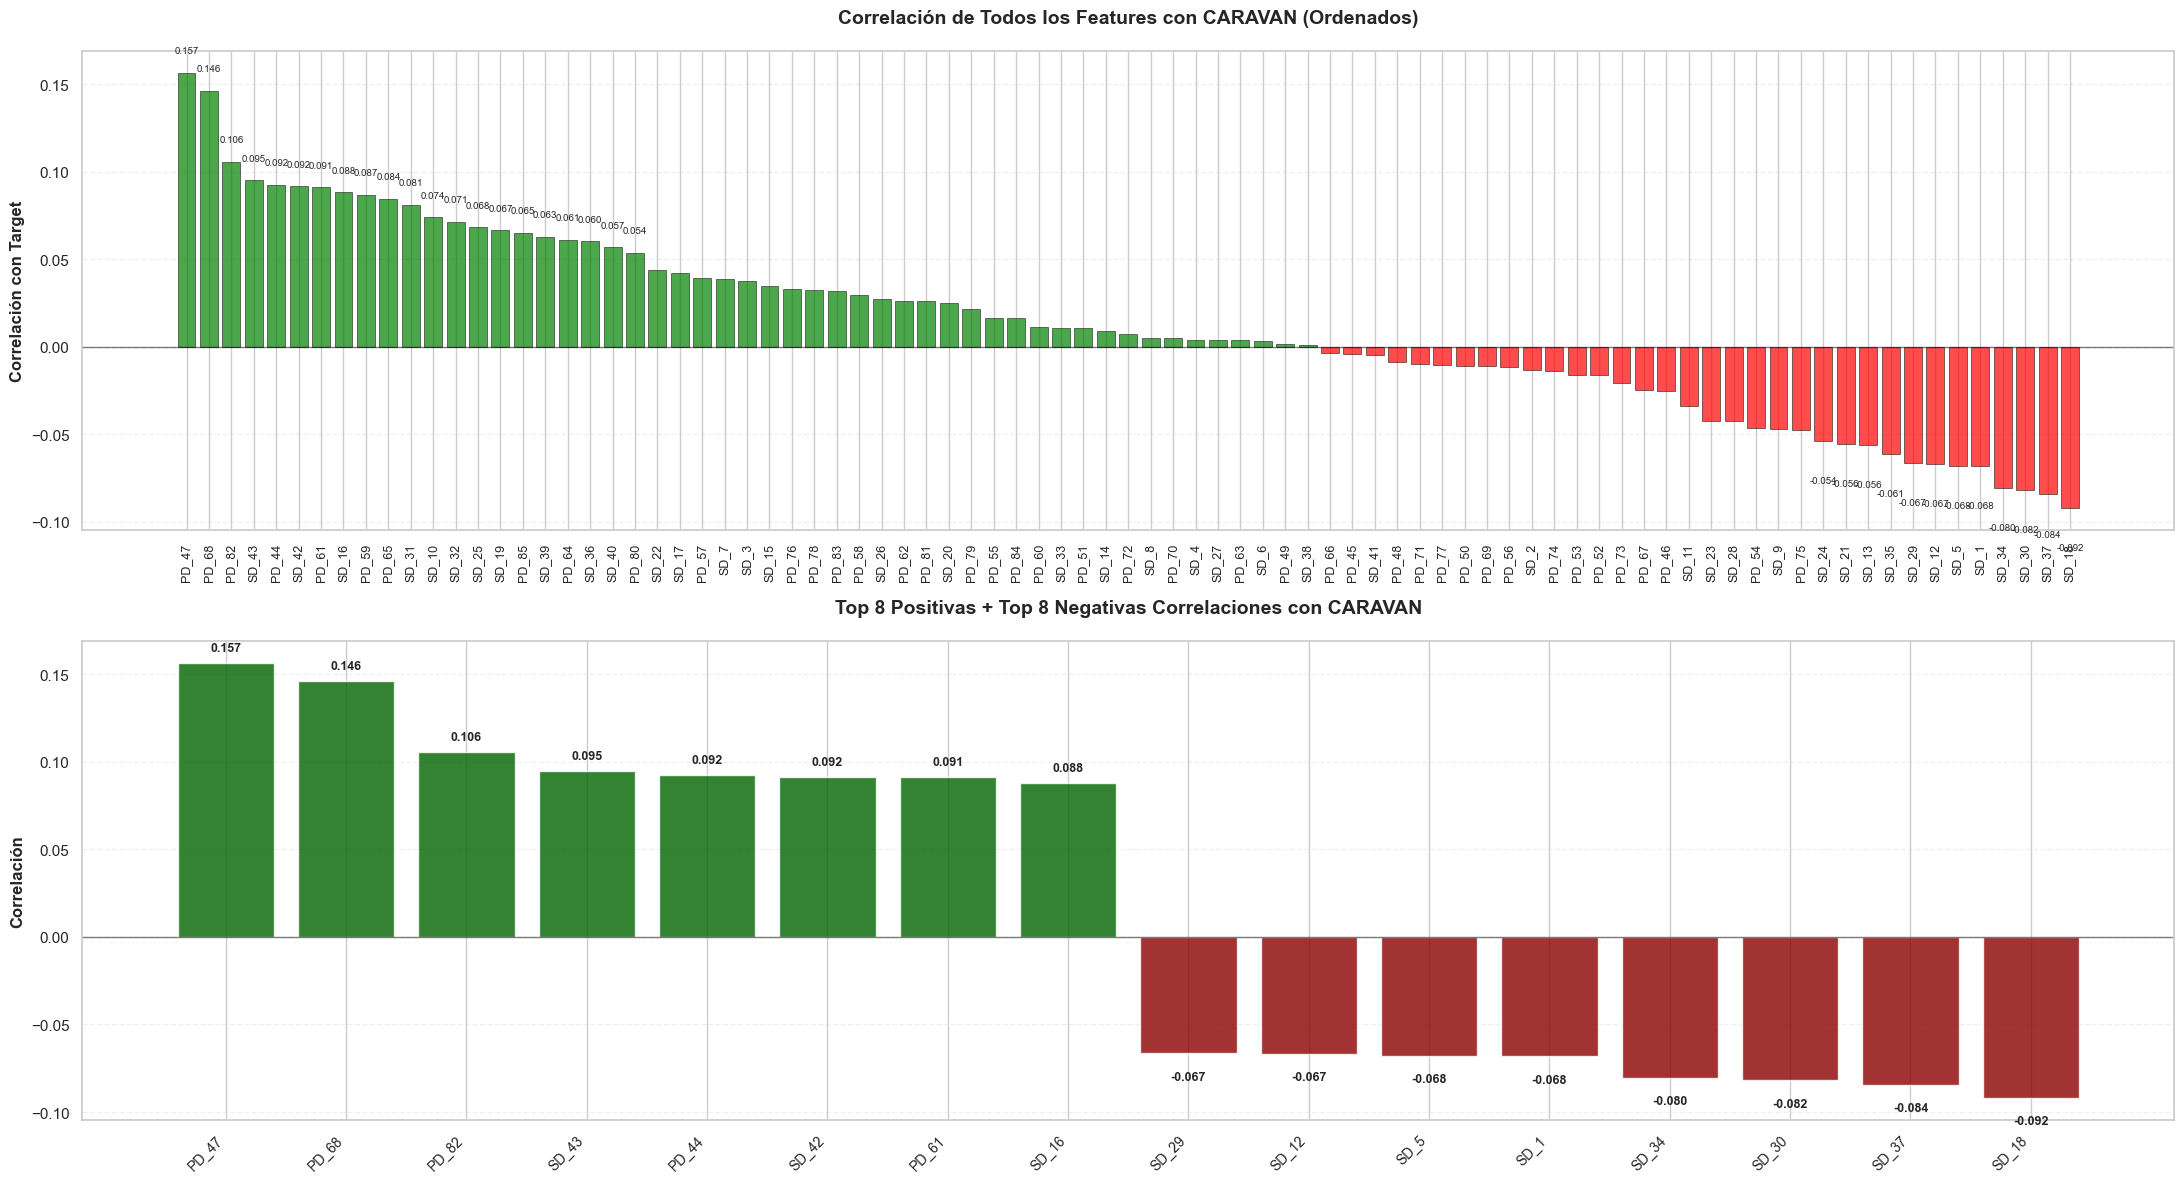

 RESUMEN DE CORRELACIONES CON TARGET:
Total features analizados: 85
Correlación máxima: 0.1565
Correlación mínima: -0.0919
Features con correlación > 0.1: 3
Features con correlación < -0.1: 0
Features con |correlación| > 0.05: 33

 TOP 5 CORRELACIONES POSITIVAS:
PD_47    0.156549
PD_68    0.146143
PD_82    0.105582
SD_43    0.094972
PD_44    0.092437
dtype: float64

 TOP 5 CORRELACIONES NEGATIVAS:
SD_1    -0.068104
SD_34   -0.080418
SD_30   -0.081840
SD_37   -0.084346
SD_18   -0.091940
dtype: float64


In [15]:
cor_target = {}

for col in df.columns[:-1]:
    corr, _ = pointbiserialr(df[col], df[target_col])
    cor_target[col] = corr
    
cor_target = pd.Series(cor_target).sort_values(key=abs, ascending=False)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 12))

cor_target_sorted = cor_target.sort_values(ascending=False)

bars1 = ax1.bar(cor_target_sorted.index, cor_target_sorted.values,
                color=['green' if x > 0 else 'red' for x in cor_target_sorted.values],
                alpha=0.7, edgecolor='black', linewidth=0.5)

ax1.set_xticks(range(len(cor_target_sorted)))
ax1.set_xticklabels(cor_target_sorted.index, rotation=90, fontsize=9)
ax1.set_ylabel("Correlación con Target", fontsize=12, fontweight='bold')
ax1.set_title("Correlación de Todos los Features con CARAVAN (Ordenados)", 
              fontsize=14, fontweight='bold', pad=20)
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

for i, (bar, value) in enumerate(zip(bars1, cor_target_sorted.values)):
    if abs(value) > 0.05:
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.01 if value > 0 else -0.02), 
                f'{value:.3f}', ha='center', va='bottom' if value > 0 else 'top', 
                fontsize=7, rotation=0)

top_pos = cor_target_sorted.head(8)
top_neg = cor_target_sorted.tail(8)
top_combined = pd.concat([top_pos, top_neg])

colors_top = ['darkgreen' if x > 0 else 'darkred' for x in top_combined.values]
bars2 = ax2.bar(range(len(top_combined)), top_combined.values, color=colors_top, alpha=0.8)

ax2.set_xticks(range(len(top_combined)))
ax2.set_xticklabels(top_combined.index, rotation=45, fontsize=10, ha='right')
ax2.set_ylabel("Correlación", fontsize=12, fontweight='bold')
ax2.set_title("Top 8 Positivas + Top 8 Negativas Correlaciones con CARAVAN", 
              fontsize=14, fontweight='bold', pad=20)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

for i, (bar, value) in enumerate(zip(bars2, top_combined.values)):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.005 if value > 0 else -0.01), 
            f'{value:.3f}', ha='center', va='bottom' if value > 0 else 'top', 
            fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print(" RESUMEN DE CORRELACIONES CON TARGET:")
print(f"Total features analizados: {len(cor_target)}")
print(f"Correlación máxima: {cor_target.max():.4f}")
print(f"Correlación mínima: {cor_target.min():.4f}")
print(f"Features con correlación > 0.1: {sum(cor_target > 0.1)}")
print(f"Features con correlación < -0.1: {sum(cor_target < -0.1)}")
print(f"Features con |correlación| > 0.05: {sum(abs(cor_target) > 0.05)}")

print("\n TOP 5 CORRELACIONES POSITIVAS:")
print(cor_target_sorted.head(5))
print("\n TOP 5 CORRELACIONES NEGATIVAS:")
print(cor_target_sorted.tail(5))

# Resultados del EDA

* Se observa una alta correlación en pares entre columnas de información de producto, de la forma:
  - PD_65 - PD_44
  - PD_66 - PD_45
  - PD_67 - PD_46
  - ...
  - PD_85 - PD_64

Esto indica una **redundancia en los datos de productos**, probablemente debido a que algunas columnas son versiones derivadas o transformadas de otras, por lo que aportan poca información para un modelo, al ser redundantes es recomendable quedarnos con uno solo de los pares.


* Algunas de las columnas de productos también tienen muy poca variabilidad, es decir, la mayoría de los clientes presentan el mismo valor en estas columnas (por ejemplo, 0 en más del 95% de los casos). Esto indica que estas variables **aportan poca información discriminativa** para predecir la adquisición del seguro de caravana, por lo que también se recomiéndan eliminar para reducir el ruido y con ello mejorar el desempeño de un modelo.

* Debido a su naturaleza agregada por zona postal, las columnas sociodemográficas presentan alta correlación entre por lo que hay que considerar aplicar reduccion de dimensionalidad para evitar redundancia y multicolinealidad en el modelo.


In [16]:
# 1 Eliminar las filas redundantes a pares, nos quedamos con el par que tiene mayor correlación con target

from scipy.stats import pointbiserialr

# a. Calcular correlación de todas las columnas con el target
target_col = df.columns[-1]
cor_target = {}
for col in df.columns[:-1]:
    corr, _ = pointbiserialr(df[col], df[target_col])
    cor_target[col] = abs(corr)
cor_target = pd.Series(cor_target)

# b. Definir pares redundantes (ejemplo conocido)
redundant_pairs = [
    ('PD_65', 'PD_44'),
    ('PD_66', 'PD_45'),
    ('PD_67', 'PD_46'),
    ('PD_68', 'PD_47'),
    ('PD_69', 'PD_48'),
    ('PD_70', 'PD_49'),
    ('PD_71', 'PD_50'),
    ('PD_72', 'PD_51'),
    ('PD_73', 'PD_52'),
    ('PD_74', 'PD_53'),
    ('PD_75', 'PD_54'),
    ('PD_76', 'PD_55'),
    ('PD_77', 'PD_56'),
    ('PD_78', 'PD_57'),
    ('PD_79', 'PD_58'),
    ('PD_80', 'PD_59'),
    ('PD_81', 'PD_60'),
    ('PD_82', 'PD_61'),
    ('PD_83', 'PD_62'),
    ('PD_84', 'PD_63'),
    ('PD_85', 'PD_64')
]
# c. Seleccionar la columna a eliminar (menor correlación con target)
cols_to_drop = []
for col1, col2 in redundant_pairs:
    if cor_target[col1] < cor_target[col2]:
        cols_to_drop.append(col1)
    else:
        cols_to_drop.append(col2)

# d. Eliminar las columnas redundantes
#df = df.drop(columns=cols_to_drop)

print(f"Columnas eliminadas: {cols_to_drop}")
print(f"Nuevo shape del dataset: {df.shape}")


Columnas eliminadas: ['PD_65', 'PD_66', 'PD_67', 'PD_68', 'PD_48', 'PD_49', 'PD_71', 'PD_72', 'PD_52', 'PD_74', 'PD_54', 'PD_55', 'PD_77', 'PD_78', 'PD_79', 'PD_80', 'PD_60', 'PD_61', 'PD_62', 'PD_63', 'PD_64']
Nuevo shape del dataset: (5219, 86)


In [17]:
# Calcular proporción de 1s en la clase minoritaria para cada columna
importance_minor_class = {}
target_col = df.columns[-1]

top_freq = df.apply(lambda x: x.value_counts(normalize=True).max())

for col in df.columns[:-1]:
    # Proporción de valores distintos de 0 entre los clientes con CARAVAN=1
    proportion_in_minority = df[df[target_col]==1][col].astype(bool).mean()
    importance_minor_class[col] = proportion_in_minority

importance_minor_class = pd.Series(importance_minor_class)

# Columnas donde >95% del dataset tiene un solo valor **y** poca representación en la clase minoritaria
almost_constant = top_freq[(top_freq > 0.95) & (importance_minor_class < 0.05)]
print(almost_constant)


PD_45    0.984288
PD_46    0.977007
PD_48    0.990803
PD_49    0.957846
PD_50    0.998276
PD_51    0.987546
PD_52    0.972600
PD_53    0.995976
PD_56    0.994060
PD_57    0.992719
PD_58    0.995593
PD_60    0.999425
PD_61    0.993677
PD_62    0.972217
PD_63    0.991378
PD_64    0.984288
PD_66    0.984288
PD_67    0.977007
PD_69    0.990803
PD_70    0.957846
PD_71    0.998276
PD_72    0.987546
PD_73    0.972600
PD_74    0.995976
PD_77    0.994060
PD_78    0.992719
PD_79    0.995593
PD_81    0.999425
PD_82    0.993677
PD_83    0.972217
PD_84    0.991378
PD_85    0.984288
dtype: float64


In [18]:
#semi_const_cols = list(almost_constant.index)

#df = df.drop(columns=semi_const_cols)

print(f"Nuevo shape del dataset: {df.shape}")

Nuevo shape del dataset: (5219, 86)


In [19]:
# Reducción de dimensionalidad en las columnas sociodemograficas

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Columnas sociodemográficas
socio_cols = df.columns[:43]
X_socio = df[socio_cols]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_socio)

# PCA
pca = PCA(n_components=0.95)  # conservar 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

# Resultados
print(f"Número de componentes retenidas: {pca.n_components_}")
print(f"Varianza explicada acumulada: {pca.explained_variance_ratio_.cumsum()}")

# Convertir a DataFrame para uso posterior
pca_cols = [f'PCS_{i+1}' for i in range(pca.n_components_)]
df_pca = pd.DataFrame(X_pca, columns=pca_cols, index=df.index)

# Ahora df_pca contiene las componentes principales
df_pca.head()


Número de componentes retenidas: 26
Varianza explicada acumulada: [0.21801424 0.32767018 0.39549126 0.44727292 0.49346315 0.53219708
 0.5652597  0.59758622 0.62759326 0.6560517  0.6838092  0.71058152
 0.73547508 0.75879199 0.78046547 0.80120942 0.82154768 0.84086214
 0.85890814 0.87621071 0.89234523 0.90699205 0.92125389 0.93437998
 0.94543391 0.95640879]


,PCS_1,PCS_2,PCS_3,PCS_4,PCS_5,PCS_6,PCS_7,PCS_8,PCS_9,PCS_10,...,PCS_17,PCS_18,PCS_19,PCS_20,PCS_21,PCS_22,PCS_23,PCS_24,PCS_25,PCS_26
0,-0.538017,-0.510063,-1.701269,-0.532874,1.469775,-1.445352,0.287525,1.302739,-1.324146,0.085980,...,0.047219,0.609105,0.226427,-0.388575,1.247216,0.323071,0.806039,-0.559759,-0.875691,-0.600638
1,2.978905,1.641497,-4.178688,-1.977414,0.318029,-0.465813,0.486637,0.159880,-0.108324,-0.420229,...,0.071903,-1.388596,0.334647,0.312007,0.603014,0.246412,0.544225,0.639379,-0.026922,-0.867982
2,-1.501396,1.021247,-2.442704,0.770906,-1.541164,-0.364118,-0.544935,-0.444880,-1.224539,0.129282,...,0.007972,-0.280665,0.245627,0.229633,-0.168573,-0.325545,0.132140,0.805274,0.857864,-1.148564
3,-4.264177,0.483834,3.255829,1.059748,1.309636,-3.172011,3.763566,-2.153527,-4.556783,-2.972544,...,0.976924,1.350267,1.915159,0.207531,-0.377500,0.696670,-0.255544,0.810816,-1.151873,-0.434668
4,2.994939,2.773977,-2.842056,-0.135054,1.541655,-2.379900,3.003411,-0.439464,0.180935,-0.808356,...,0.417772,-1.484263,-0.099717,-0.338319,-0.728806,0.733372,-1.526958,-0.334254,0.130123,-1.348392


In [20]:
product_cols = [col for col in df.columns if col.startswith('PD_')]
X_products = df[product_cols]

scaler = StandardScaler()
X_products_scaled = scaler.fit_transform(X_products)

df_products_scaled = pd.DataFrame(X_products_scaled, columns=product_cols, index=df.index)

df_final = pd.concat([df_pca, df_products_scaled, df['target']], axis=1)

# Verificar tamaño del df final
df_final.head()
print(f"Shape del dataset final: {df_final.shape}")


Shape del dataset final: (5219, 69)


In [21]:
df_final.head()

,PCS_1,PCS_2,PCS_3,PCS_4,PCS_5,PCS_6,PCS_7,PCS_8,PCS_9,PCS_10,...,PD_77,PD_78,PD_79,PD_80,PD_81,PD_82,PD_83,PD_84,PD_85,target
0,-0.538017,-0.510063,-1.701269,-0.532874,1.469775,-1.445352,0.287525,1.302739,-1.324146,0.085980,...,-0.0773,-0.085642,-0.0633,0.718613,-0.023982,-0.077813,-0.158141,-0.092297,-0.125595,0.0
1,2.978905,1.641497,-4.178688,-1.977414,0.318029,-0.465813,0.486637,0.159880,-0.108324,-0.420229,...,-0.0773,-0.085642,-0.0633,0.718613,-0.023982,-0.077813,-0.158141,-0.092297,-0.125595,0.0
2,-1.501396,1.021247,-2.442704,0.770906,-1.541164,-0.364118,-0.544935,-0.444880,-1.224539,0.129282,...,-0.0773,-0.085642,-0.0633,0.718613,-0.023982,-0.077813,-0.158141,-0.092297,-0.125595,0.0
3,-4.264177,0.483834,3.255829,1.059748,1.309636,-3.172011,3.763566,-2.153527,-4.556783,-2.972544,...,-0.0773,-0.085642,-0.0633,0.718613,-0.023982,-0.077813,-0.158141,-0.092297,-0.125595,0.0
4,2.994939,2.773977,-2.842056,-0.135054,1.541655,-2.379900,3.003411,-0.439464,0.180935,-0.808356,...,-0.0773,-0.085642,-0.0633,-1.052134,-0.023982,-0.077813,-0.158141,-0.092297,-0.125595,0.0


# Modelado

In [22]:
from sklearn.model_selection import train_test_split

X = df_final.drop(columns='target')
y = df_final['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

train_data = X_train.copy()
train_data['target'] = y_train


In [23]:
from pycaret.classification import setup, compare_models, evaluate_model

# Inicializar setup
clf_setup = setup(
    data=train_data,
    target='target',
    session_id=42,
    normalize=True,           # normaliza las features automáticamente
    fix_imbalance=True,       # aplica técnicas como SMOTE para balancear clases
    fold=5                    # cross-validation
)


,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(4175, 69)"
4,Transformed data shape,"(6717, 69)"
5,Transformed train set shape,"(5464, 69)"
6,Transformed test set shape,"(1253, 69)"
7,Numeric features,68
8,Preprocess,True
9,Imputation type,simple


In [24]:
# Encuentra el mejor modelo automáticamente
best_model = compare_models(
    sort='AUC',      # dado que es desbalanceado, AUC es un buen criterio
    n_select=1
)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.6827,0.7036,0.6263,0.1220,0.2042,0.1070,0.1637,0.3740
lda,Linear Discriminant Analysis,0.6824,0.7034,0.6263,0.1219,0.2041,0.1068,0.1634,0.0140
gbc,Gradient Boosting Classifier,0.8754,0.6978,0.2526,0.1755,0.2070,0.1416,0.1445,0.6820
lightgbm,Light Gradient Boosting Machine,0.9069,0.6917,0.1316,0.1914,0.1546,0.1074,0.1101,0.5940
lr,Logistic Regression,0.6916,0.6872,0.5789,0.1181,0.1962,0.0989,0.1473,0.5700
ada,Ada Boost Classifier,0.8183,0.6816,0.3526,0.1383,0.1983,0.1165,0.1338,0.1320
xgboost,Extreme Gradient Boosting,0.9021,0.6763,0.1474,0.1794,0.1616,0.1105,0.1110,0.0680
rf,Random Forest Classifier,0.9049,0.6760,0.1158,0.1628,0.1346,0.0863,0.0878,0.1540
et,Extra Trees Classifier,0.9117,0.6730,0.0947,0.1781,0.1218,0.0802,0.0855,0.0640
svm,SVM - Linear Kernel,0.6786,0.6684,0.6211,0.1208,0.2021,0.1045,0.1592,0.0220


In [25]:
from pycaret.classification import predict_model

# Crear DataFrame de test
test_data = X_test.copy()
test_data['target'] = y_test

# Predicciones
predictions = predict_model(best_model, data=test_data)
predictions.head()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.6734,0.6680,0.6618,0.1240,0.2088,0.1113,0.1741


,PCS_1,PCS_2,PCS_3,PCS_4,PCS_5,PCS_6,PCS_7,PCS_8,PCS_9,PCS_10,...,PD_78,PD_79,PD_80,PD_81,PD_82,PD_83,PD_84,PD_85,target,prediction_label
1989,1.049142,-2.576530,-1.484639,2.098989,-0.913198,0.533883,0.286922,0.613443,-1.150840,-0.351414,...,-0.085642,-0.0633,0.718613,-0.023982,-0.077813,-0.158141,-0.092297,-0.125595,0.0,0
1322,4.252397,-0.572941,0.191517,2.644256,-1.040000,0.815702,-1.796751,-1.655659,-0.527909,-0.900723,...,-0.085642,-0.0633,0.718613,-0.023982,-0.077813,-0.158141,-0.092297,-0.125595,0.0,0
3152,-3.281208,-1.323837,0.268330,-3.072485,0.727160,-0.065056,0.527502,0.651491,1.288870,-1.276850,...,-0.085642,-0.0633,-1.052134,-0.023982,-0.077813,-0.158141,-0.092297,-0.125595,0.0,0
4685,-0.195257,0.603109,0.981153,-1.250752,0.662688,-2.197881,1.543762,1.095911,0.635485,-0.154515,...,-0.085642,-0.0633,0.718613,-0.023982,-0.077813,-0.158141,-0.092297,-0.125595,0.0,1
5157,3.182229,3.468173,-3.742710,-1.113570,1.072389,-0.614520,1.110349,-0.811091,-0.378990,-1.022380,...,-0.085642,-0.0633,0.718613,-0.023982,-0.077813,-0.158141,-0.092297,-0.125595,0.0,0


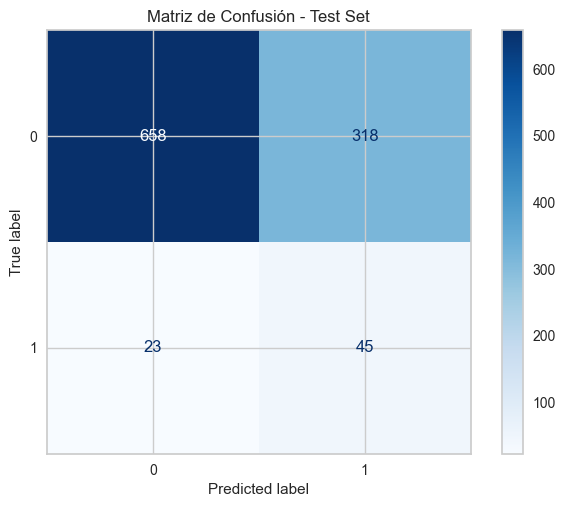

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de confusión
y_true = predictions['target']
y_pred = predictions['prediction_label']  # PyCaret crea esta columna con las predicciones finales

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

# Mostrar
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Test Set")
plt.show()


In [30]:
predictions['target'].value_counts()

0.0    976
1.0     68
Name: target, dtype: int64

In [ ]:
# Tengo muchos falsos positivos